In [83]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

**#Splitng my movie_rating.csv file into size 627090**

In [48]:
chunk_size = 627090
batch_no = 1

for chunk in pd.read_csv('movie_rating.csv', chunksize=chunk_size):
    chunk.to_csv('movie_rating'+str(batch_no)+'.csv',index=False)
    batch_no +=1

In [106]:
data1=pd.read_csv("movie_rating1.csv")

In [107]:
data1

,userId,movieId,rating,timestamp
0,1,296,5.0,1147880044
1,1,306,3.5,1147868817
2,1,307,5.0,1147868828
3,1,665,5.0,1147878820
4,1,899,3.5,1147868510
...,...,...,...,...
627085,4298,33679,2.5,1513368140
627086,4298,35836,2.5,1513368114
627087,4298,45722,2.0,1513368106
627088,4298,81834,4.5,1513368942


In [108]:
data1.shape

(627090, 4)

In [109]:
data1.describe

<bound method NDFrame.describe of         userId  movieId  rating   timestamp
0            1      296     5.0  1147880044
1            1      306     3.5  1147868817
2            1      307     5.0  1147868828
3            1      665     5.0  1147878820
4            1      899     3.5  1147868510
...        ...      ...     ...         ...
627085    4298    33679     2.5  1513368140
627086    4298    35836     2.5  1513368114
627087    4298    45722     2.0  1513368106
627088    4298    81834     4.5  1513368942
627089    4298    88125     4.5  1513448880

[627090 rows x 4 columns]>

In [110]:
data1.size

2508360

In [111]:
data1.rating.describe()

count    627090.000000
mean          3.539691
std           1.052635
min           0.500000
25%           3.000000
50%           3.500000
75%           4.000000
max           5.000000
Name: rating, dtype: float64

**#Searching for duplicate values, if available(True) then they will be removed**

In [112]:
data1.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
627085    False
627086    False
627087    False
627088    False
627089    False
Length: 627090, dtype: bool

**#Searching for null(empty) values, if available(True) then they will be removed**

In [113]:
data1.isnull()

,userId,movieId,rating,timestamp
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
627085,False,False,False,False
627086,False,False,False,False
627087,False,False,False,False
627088,False,False,False,False


**#Sorting 'Rating' values in descending order**

In [114]:
data1.sort_values(by="rating", ascending=False)

,userId,movieId,rating,timestamp
0,1,296,5.0,1147880044
327992,2271,527,5.0,1273824734
327918,2270,5481,5.0,1353082443
327922,2270,6537,5.0,1353083219
327923,2270,6874,5.0,1353082780
...,...,...,...,...
462014,3164,1381,0.5,1223609158
122427,876,2706,0.5,1191932808
581107,3959,40815,0.5,1507031639
581109,3959,41566,0.5,1507031688


**#Total movies in each rating**

In [115]:
data1[data1.rating==5.0].count()

userId       90782
movieId      90782
rating       90782
timestamp    90782
dtype: int64

In [116]:
data1[data1.rating==4.0].count()

userId       168387
movieId      168387
rating       168387
timestamp    168387
dtype: int64

In [117]:
data1[data1.rating==3.0].count()

userId       122816
movieId      122816
rating       122816
timestamp    122816
dtype: int64

In [118]:
data1[data1.rating==2.0].count()

userId       41269
movieId      41269
rating       41269
timestamp    41269
dtype: int64

In [119]:
data1[data1.rating==1.0].count()

userId       18634
movieId      18634
rating       18634
timestamp    18634
dtype: int64

**#Top 10 high rated movies**

In [120]:
TopTenRating=data1.sort_values(by="rating", ascending=False).head(10)

In [121]:
TopTenRating

,userId,movieId,rating,timestamp
0,1,296,5.0,1147880044
327992,2271,527,5.0,1273824734
327918,2270,5481,5.0,1353082443
327922,2270,6537,5.0,1353083219
327923,2270,6874,5.0,1353082780
327924,2270,6934,5.0,1353083133
327925,2270,7438,5.0,1353082782
327927,2270,8665,5.0,1353083060
327929,2270,8961,5.0,1353082847
327930,2270,51255,5.0,1353083108


**#Descriptive Rating statistics with Pandas**

In [122]:
df=pd.DataFrame(data1)

In [123]:
df["rating"].describe

<bound method NDFrame.describe of 0         5.0
1         3.5
2         5.0
3         5.0
4         3.5
         ... 
627085    2.5
627086    2.5
627087    2.0
627088    4.5
627089    4.5
Name: rating, Length: 627090, dtype: float64>

**#Visualizing the dataset with Seaborn pairplot**

In [124]:
sns.set_style("whitegrid")

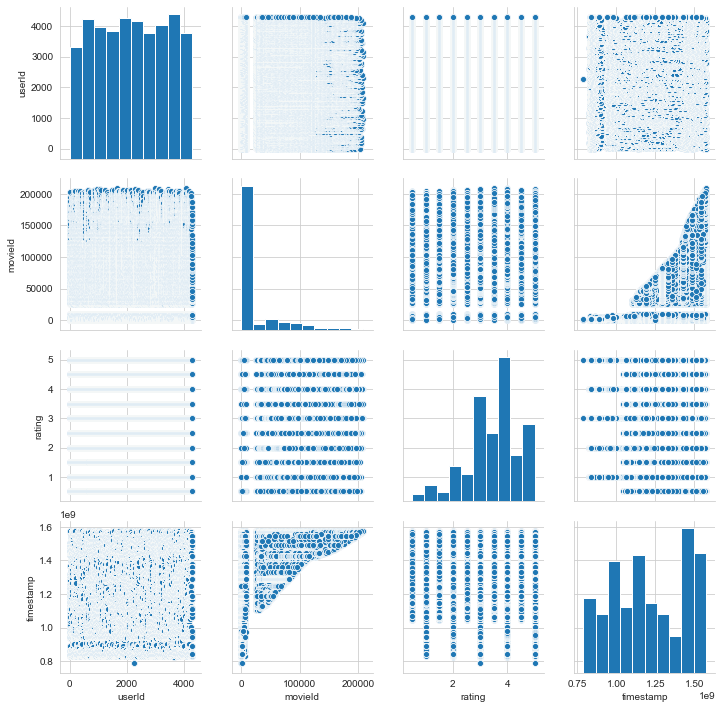

In [125]:
grid=sns.pairplot(data=df, vars = df.columns[0:4])

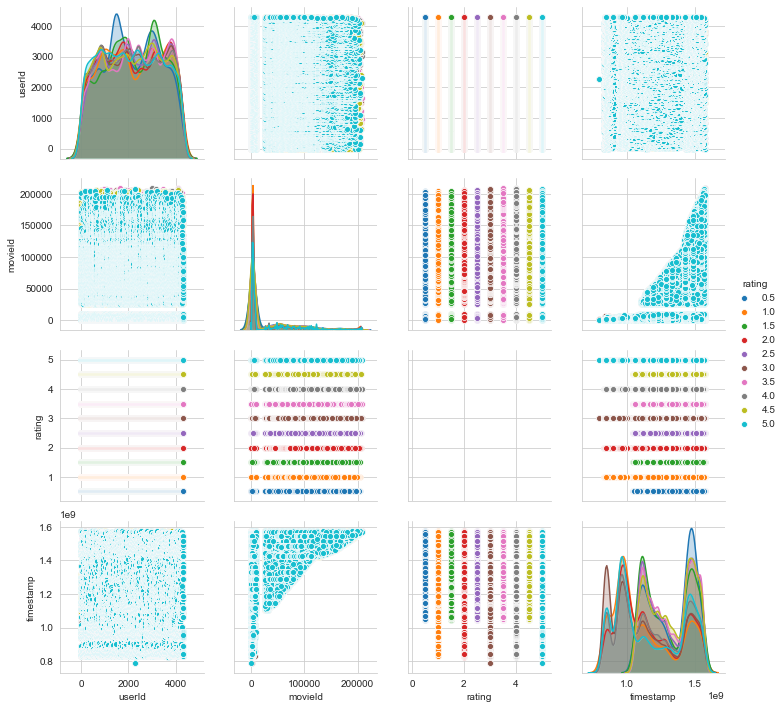

In [127]:
grid=sns.pairplot(data=df,vars=df.columns[0:4],hue="rating")

**#Clustering with SKlearn**

In [128]:
from sklearn.cluster import KMeans

In [129]:
kmeans=KMeans(n_clusters=3,max_iter=50,random_state=11)

In [130]:
kmeans.fit(df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=11, tol=0.0001, verbose=0)

In [134]:
print(kmeans.labels_[0:1000])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 

In [136]:
print(kmeans.labels_[1000:1500])

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 

In [137]:
kit=pd.DataFrame(kmeans.labels_,index=df.userId,columns=["Cluster ID"])

In [138]:
kit

,Cluster ID
userId,
1,0
1,0
1,0
1,0
1,0
...,...
4298,1
4298,1
4298,1


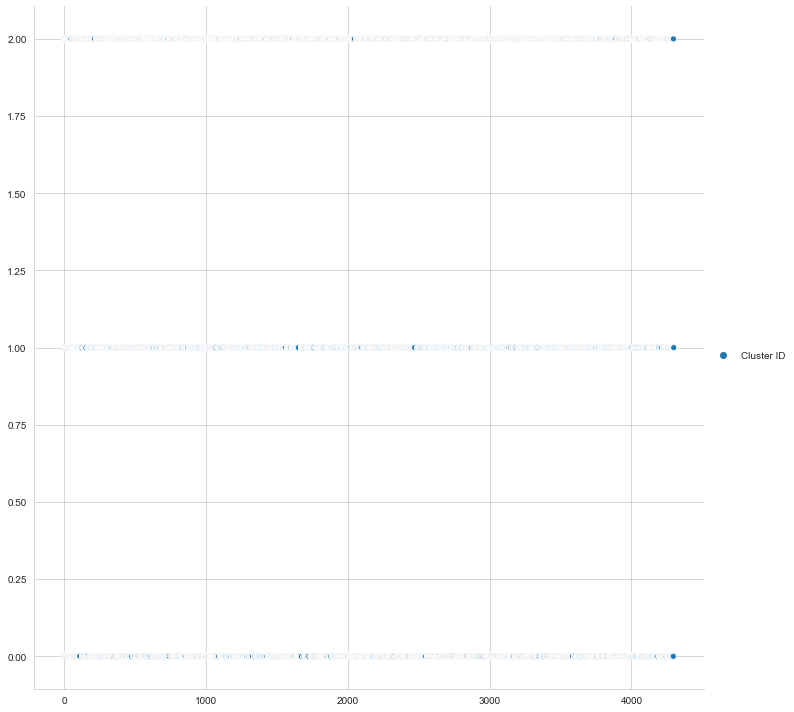

In [139]:
cluster_grid=sns.relplot(data=kit,hue="cluster_ID",height=10,aspect=1)